# Checking out some instances to check if everything works fine

In [1]:
# import the stuff
from cetsp_bnb2 import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution, compute_tour_from_sequence, optimize_tour_by_lns

In [2]:
# Load instances
import aemeasure
db_ = aemeasure.Database("instance_db")
data = db_.load()
instances = {instance["instance"]: instance  for instance in data}

In [3]:
list(instances.keys())

['srpg_octa0000092/upper_bound_70.json',
 'srpg_octa0000092/upper_bound_27.json',
 'srpg_octa0000092/upper_bound_31.json',
 'srpg_octa0000092/upper_bound_66.json',
 'srpg_octa0000092/upper_bound_5.json',
 'srpg_octa0000092/upper_bound_9.json',
 'srpg_octa0000092/upper_bound_11.json',
 'srpg_octa0000092/upper_bound_46.json',
 'srpg_octa0000092/upper_bound_50.json',
 'srpg_octa0000092/lower_bound_2.json',
 'srpg_octa0000092/upper_bound_51.json',
 'srpg_octa0000092/upper_bound_47.json',
 'srpg_octa0000092/upper_bound_8.json',
 'srpg_octa0000092/upper_bound_10.json',
 'srpg_octa0000092/upper_bound_4.json',
 'srpg_octa0000092/upper_bound_67.json',
 'srpg_octa0000092/upper_bound_30.json',
 'srpg_octa0000092/upper_bound_26.json',
 'srpg_octa0000092/upper_bound_71.json',
 'srpg_octa0000092/upper_bound_17.json',
 'srpg_octa0000092/upper_bound_40.json',
 'srpg_octa0000092/upper_bound_56.json',
 'srpg_octa0000092/upper_bound_21.json',
 'srpg_octa0000092/upper_bound_37.json',
 'srpg_octa0000092/up

In [4]:
instance = Instance([Circle(Point(float(d["x"]), float(d["y"])), float(d["radius"])) for d in instances['srpg_octa0000092/lower_bound_2.json']["circles"]])

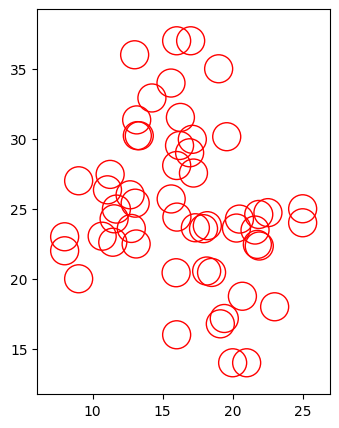

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [11]:
# trigger_lazy_computation an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance).get_trajectory()

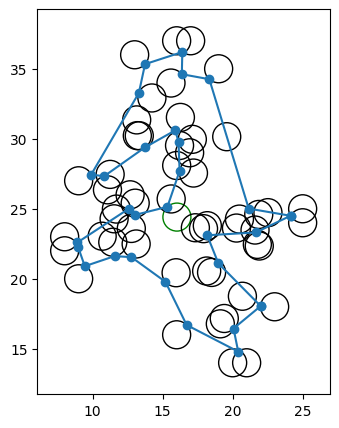

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution, highlight=[15])

20 circles  to be  recovered
Using node simplification.
Using ChFarthestCircle-Branching
Using DfsBfs search
Starting with root node of size 1
i	LB	|	UB	|	Time
1	26.4728	|	32.5204	|	0.001s
2	27.2062	|	32.5204	|	0.002s
3	27.2062	|	32.5204	|	0.004s
4	27.2062	|	32.5204	|	0.004s
5	30.9745	|	32.5204	|	0.005s
6	31.7589	|	32.5204	|	0.007s
7	32.7173	|	32.5204	|	0.01s
---------------
7	32.7173	|	32.5204
7 iterations with 6 nodes explored and 6 branches.
16 circles  to be  recovered
Using node simplification.
Using ChFarthestCircle-Branching
Using DfsBfs search
Starting with root node of size 1
i	LB	|	UB	|	Time
1	22.2464	|	29.1019	|	0.001s
2	24.0081	|	29.1019	|	0.002s
3	24.0081	|	29.1019	|	0.004s
4	24.0081	|	29.1019	|	0.004s
5	27.0304	|	29.1019	|	0.006s
6	28.1256	|	29.1019	|	0.007s
7	28.7532	|	29.1019	|	0.009s
8	29.2382	|	29.1019	|	0.012s
---------------
8	29.2382	|	29.1019
8 iterations with 7 nodes explored and 7 branches.
16 circles  to be  recovered
Using node simplification.
Using ChFarthest

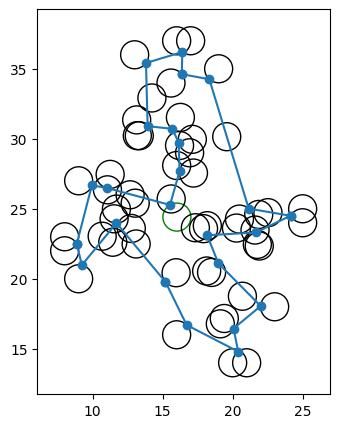

In [14]:
initial_solution = optimize_tour_by_lns(instance, initial_solution, 20, 10);
plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution, highlight=[15])

Using node simplification.
Using ChFarthestCircle-Branching
Using DfsBfs search
Starting with root node of size 14
i	LB	|	UB	|	Time
1	60.2736	|	76.3522	|	0.027s
2	60.3318	|	76.3522	|	0.06s
3	60.3318	|	76.3522	|	0.098s
4	60.3318	|	76.3522	|	0.138s
5	60.3318	|	76.3522	|	0.178s
6	60.3318	|	76.3522	|	0.22s
7	60.3318	|	76.3522	|	0.263s
8	60.3318	|	76.3522	|	0.306s
9	60.3318	|	76.3522	|	0.354s
10	60.3318	|	76.3522	|	0.41s
20	60.3318	|	76.3522	|	1.302s
30	61.21	|	71.0407	|	1.86s
40	61.21	|	71.0407	|	2.652s
50	62.4745	|	69.8975	|	3.2s
60	63.1555	|	69.8975	|	3.517s
70	63.3262	|	69.8975	|	4.071s
80	63.5102	|	69.8975	|	4.389s
90	63.8325	|	69.8975	|	4.925s


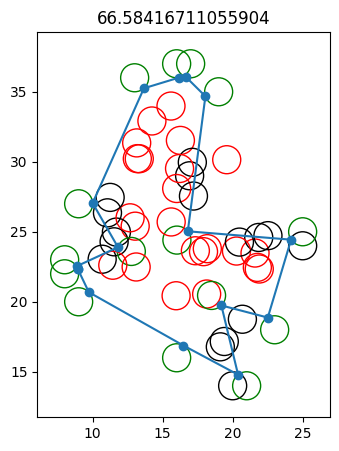

100	64.3885	|	69.8975	|	5.635s


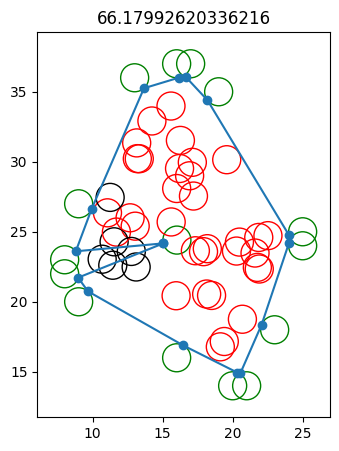

200	66.2701	|	68.8487	|	10.328s


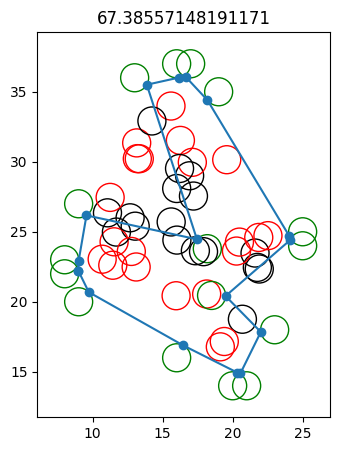

300	67.4055	|	68.8487	|	13.576s
400	67.9918	|	68.8487	|	16.111s
---------------
433	68.1792	|	68.8487
433 iterations with 315 nodes explored and 312 branches.


In [15]:
timelimit = 220
node_values = []
def count(event):
    global node_values
    node_values.append(event.current_node.get_relaxed_solution().get_trajectory().length())
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    depth = event.current_node.depth()

    if event.num_iterations % 100 == 0:
        plt.figure(figsize=(5, 5))
        plot_solution(plt.gca(), instance, event.get_relaxed_solution().get_trajectory(), highlight=event.current_node.get_fixed_sequence())
        plt.title(event.get_relaxed_solution().get_trajectory().length())
        plt.show()
        
opt_solution, lb = branch_and_bound(instance, count, initial_solution, timelimit)

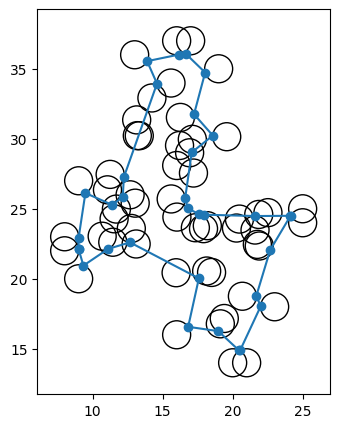

In [10]:
plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)